# Мобильное приложение "Ненужные вещи" -  *Выделение групп пользователей на основе поведения*
*Анализ от 1 июня 2023 года*

# Декомпозиция
**1. Предобработка**

- проверка названий столбцов,
- преобразование данных в нужные типы,
- обработка пропусков и дубликатов.
 
**2. Собрать все функции**

**3. Исследовательский анализ данных - общее поведение пользователей**

- retention rate,
- время, проведённое в приложении, 
- частота действий, 
- конверсия в целевое действие — просмотр контактов.
    
**4. Сегментация пользователей на основе действий**

- собственно разделение пользователей на группы
- ответы на вопросы:
    - Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)?
    - Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?

**5. Проверка гипотез**
- Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.
- Возможно пользователи по будням более целенаправленно ищут продукт. Гипотеза 2: Пользователи, которые чаще пользуются приложением по будням, демонстрируют выше конверсию в просмотры контактов, чем пользователи, которые заходят в приложение в основном по выходням. 

**6. Выводы**

**7. Ссылка на дашборд**

**8. Ссылка на презентацию**

## **Описание данных**

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет **mobile_dataset.csv** содержит колонки:
- `event.time` — время совершения
- `event.name` — название события
   
   Расшифровки событий:
    - `advert_open` — открытие карточки объявления
    - `photos_show` — просмотр фотографий в объявлении
    - `tips_show` — пользователь увидел рекомендованные объявления
    - `tips_click` — пользователь кликнул по рекомендованному объявлению
    - `contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления
    - `contacts_call` — пользователь позвонил по номеру телефона на карточке объявления
    - `map` — пользователь открыл карту размещенных объявлений
    - `search_1` — `search_7` — разные события, связанные с поиском по сайту
    - `favorites_add` — добавление объявления в избранное
- `user.id` — идентификатор пользователя

Датасет **mobile_sources.csv** содержит колонки:
- `userId` — идентификатор пользователя
- `source` — источник, с которого пользователь установил приложение

# Содержание
1. [Предобработка данных](#preprocessing)
    * [Датасет mobile_dataset.csv](#mobile_dataset)
    * [Датасет mobile_sources.csv](#mobile_sources)
    
2. [Функции](#f)

3. [Исследовательский анализ данных](#analysis)
    * [3.1 Выделение сессий](#sessions)
    * [3.2 Retetion Rate](#retetion_rate) 
    * [3.3 Время, проведённое в приложении](#time_in_app)
    * [3.4 Частота действий](#action)
    * [3.5 Конверсия в целевое действие — просмотр контактов](#conversion)

4. [Сегментация пользователей на основе действий](#groups)
    * [4.1 Сегментация пользователей](#groups1)
    * [4.2 Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)?](#groups_rr)
    * [4.3 Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?](#groups_conv)

5. [Решение гипотез](#hypotheses)
    * [5.1 Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов](#hypotheses1)
    * [5.2 Пользователи, которые чаще пользуются приложением по будням, демонстрируют выше конверсию в просмотры контактов, чем пользователи, которые заходят в приложение в основном по выходням](#hypotheses2)

6. [Выводы](#conclusion)

7. [Tableau](#tableau)

8. [Презентация](#presentation)

In [1]:
# импорт библиотек
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

import datetime as dt
from datetime import datetime, timedelta

from scipy import stats as st
import math as mth
import numpy as np

# 1. Предобработка данных <a class="anchor" id="preprocessing"></a>

## 1.1 Датасет mobile_dataset.csv <a class="anchor" id="mobile_dataset"></a>

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
data.head()

event.time   event.name  \
0  2019-10-07 00:00:00.431357  advert_open   
1  2019-10-07 00:00:01.236320    tips_show   
2  2019-10-07 00:00:02.245341    tips_show   
3  2019-10-07 00:00:07.039334    tips_show   
4  2019-10-07 00:00:56.319813  advert_open   

                                user.id  
0  020292ab-89bc-4156-9acf-68bc2783f894  
1  020292ab-89bc-4156-9acf-68bc2783f894  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
3  020292ab-89bc-4156-9acf-68bc2783f894  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


### 1.1.1 Названия столбцов

In [4]:
data = data.rename(columns ={'event.time': 'event_time', 'event.name': 'event_name', 'user.id': 'user_id'})

### 1.1.2 Тип данных

In [5]:
data['event_time'] = pd.to_datetime(data['event_time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [6]:
print(f'Дата начала выгрузки:', data['event_time'].min())
print(f'Последняя дата выгрузки:', data['event_time'].max())

Дата начала выгрузки: 2019-10-07 00:00:00.431357
Последняя дата выгрузки: 2019-11-03 23:58:12.532487


**С типами всё теперь в порядке. Содержатся данные с 7 октября по 3 ноября 2019 годы.**

### 1.1.3 Пропуски<a id="#null"></a>

In [7]:
data.isna().sum()

event_time    0
event_name    0
user_id       0
dtype: int64

**Пропусков нет.**

### 1.1.4 Дубликаты

In [8]:
# объединим contacts_show и show_contacts
data.loc[data['event_name'] == 'show_contacts', 'event_name'] = 'contacts_show'

data.loc[data['event_name'] == 'search_1', 'event_name'] = 'search'
data.loc[data['event_name'] == 'search_2', 'event_name'] = 'search'
data.loc[data['event_name'] == 'search_3', 'event_name'] = 'search'
data.loc[data['event_name'] == 'search_4', 'event_name'] = 'search'
data.loc[data['event_name'] == 'search_5', 'event_name'] = 'search'
data.loc[data['event_name'] == 'search_6', 'event_name'] = 'search'
data.loc[data['event_name'] == 'search_7', 'event_name'] = 'search'

data['event_name'].value_counts()

tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

In [9]:
#проверка на дубликаты
print(f'Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


**Дубликаты отсутствуют.**

## 1.2 Датасет mobile_sources.csv<a class="anchor" id="mobile_sources"></a>

In [10]:
sources = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv')
sources

userId  source
0     020292ab-89bc-4156-9acf-68bc2783f894   other
1     cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex
2     8c356c42-3ba9-4cb6-80b8-3f868d0192c3  yandex
3     d9b06b47-0f36-419b-bbb0-3533e582a6cb   other
4     f32e1e2a-3027-4693-b793-b7b3ff274439  google
...                                    ...     ...
4288  b86fe56e-f2de-4f8a-b192-cd89a37ecd41  yandex
4289  424c0ae1-3ea3-4f1e-a814-6bac73e48ab1  yandex
4290  437a4cd4-9ba9-457f-8614-d142bc48fbeb  yandex
4291  c10055f0-0b47-477a-869e-d391b31fdf8f  yandex
4292  d157bffc-264d-4464-8220-1cc0c42f43a9  google

[4293 rows x 2 columns]

In [11]:
# всего пользователей
users = sources['userId'].nunique()

### 1.2.1 Названия столбцов

In [12]:
sources.columns = ['user_id', 'source']
sources.head()

user_id  source
0  020292ab-89bc-4156-9acf-68bc2783f894   other
1  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex
2  8c356c42-3ba9-4cb6-80b8-3f868d0192c3  yandex
3  d9b06b47-0f36-419b-bbb0-3533e582a6cb   other
4  f32e1e2a-3027-4693-b793-b7b3ff274439  google

### 1.2.2 Пропуски

In [13]:
sources.isna().sum()

user_id    0
source     0
dtype: int64

**Пропусков нет.**

### 1.2.3 Дубликаты

In [14]:
#проверка на уникальность источников
sources['source'].unique()

array(['other', 'yandex', 'google'], dtype=object)

In [15]:
#проверка на дубликаты
print(f'Количество дубликатов:', sources.duplicated().sum())

Количество дубликатов: 0


**Дубликаты отсутствуют.**

**ВЫВОД:** На этапе предобработки данных выяснилось, что пропусков и дубликатов нет. Были изменены названия столбцов в обоих датасетах. Изменили тип данных на временной в датасете mobile_dataset.csv.

# 2 Функции <a class="anchor" id="f"></a>

- `get_profiles()` — для создания профилей пользователей,
- `get_session_start()` - функция для создания времени начала сессии,
- `get_session_end()` - функция для создания времени конца сессии,
- `get_retention()` — для подсчёта Retention Rate,
- `categorize_sessions()` - функция, которая выделяет время
- `get_conversion` - функция для расчета конверсии

In [16]:
# функция для создания пользовательских профилей
def get_profiles(sessions):
 
    profiles = (
        data.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first', 'source': 'first'})
        .rename(columns={'event_time': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )
    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    return profiles

In [17]:
# функция для создания времени начала сессии
def get_session_start(sessions):
 
    sessions = (
        data.sort_values(by=['session_id', 'user_id'])
        .groupby(['session_id','user_id'])
        .agg({'event_time': 'first'})
        .rename(columns={'event_time': 'session_start'})
        .reset_index()
    )

    return sessions

In [18]:
# функция для создания времени конца сессии
def get_session_end(sessions):
 
    sessions = (
        data.sort_values(by=['session_id', 'user_id'])
        .groupby(['session_id','user_id'])
        .agg({'event_time': 'last'})
        .rename(columns={'event_time': 'session_end'})
        .reset_index()
    )

    return sessions

In [19]:
# функция для расчёта удержания
def get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=[], ignore_horizon=False
):
    
    # рассчитываем максимально возможную дату привлечения
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    # исключаем пользователей, пришедших после максимальной даты привлечения
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # присоединяем session_start к профилям по столбцу user_id
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    # вычисляем лайфтайм для каждой сессии в днях
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    # строим таблицу удержания
    result_grouped = result_raw.pivot_table(
        index=dimensions, columns='lifetime', values='user_id', aggfunc='nunique'
    )
    #вычисляем размеры когорт
    cohort_sizes = (
        result_raw.groupby(dimensions)
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    #объединяем размеры когорт и таблицу удержания
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'
    ).fillna(0)
    #делим данные таблицы удержания на размеры когорт
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)
    
    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes
    
    # возвращаем таблицу удержания и сырые данные
    return result_raw, result_grouped

In [20]:
# функция, которая выделяет время
def categorize_sessions(hour):
    try:
        if 0 <= hour < 6:
            return 'ночь'
        elif 6 <= hour < 11:
            return 'утро'
        elif 11 <= hour < 18:
            return 'день'
        elif 18 <= hour < 24:
            return 'вечер'
    except:
        pass

In [21]:
# функция для расчета конверсии
def get_conversion(
    profiles,
    data_contacts_show,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # находим дату и время первой покупки для каждого пользователя
    first_contacts_show = (
        data_contacts_show.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first'})
        .reset_index()
    )

    # добавляем данные о целевом действии в профили
    result_raw = result_raw.merge(
        first_contacts_show[['user_id', 'event_time']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждого целевого действия
    result_raw['lifetime'] = (
        result_raw['event_time'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # построить таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )

        # посчитать сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)

        # вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # объединить таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # разделить каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)

        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

# 3 Исследовательский анализ данных <a class="anchor" id="analysis"></a>

In [22]:
# объединяем таблицы
data = data.merge(sources, on='user_id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.8+ MB


## 3.1 Выделение сессий <a class="anchor" id="sessions"></a>

In [23]:
data = data.sort_values(['user_id', 'event_time'])
#оставляем 60 мин как разница между сессиями
g = (data.groupby('user_id')['event_time'].diff() > pd.Timedelta('60Min')).cumsum()
#создание id сессий
data['session_id'] = data.groupby(['user_id', g], sort=False).ngroup() + 1
data

event_time     event_name  \
2171  2019-10-07 13:39:45.989359      tips_show   
2172  2019-10-07 13:40:31.052909      tips_show   
2173  2019-10-07 13:41:05.722489      tips_show   
2174  2019-10-07 13:43:20.735461      tips_show   
2175  2019-10-07 13:45:30.917502      tips_show   
...                          ...            ...   
19048 2019-11-03 15:51:23.959572      tips_show   
19049 2019-11-03 15:51:57.899997  contacts_show   
19050 2019-11-03 16:07:40.932077      tips_show   
19051 2019-11-03 16:08:18.202734      tips_show   
19052 2019-11-03 16:08:25.388712      tips_show   

                                    user_id  source  session_id  
2171   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other           1  
2172   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other           1  
2173   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other           1  
2174   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other           1  
2175   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other           1  
...                                     ...     ...         ...  
19048  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573  
19049  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573  
19050  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573  
19051  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573  
19052  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573  

[74197 rows x 5 columns]

**Сформированы сессии, разница между которыми условно была взята 60 мин.**

## 3.2 Retetion Rate <a class="anchor" id="retetion_rate"></a>

In [24]:
# профили
profiles = get_profiles(data)
profiles.sample(3)

user_id                   first_ts source  \
1648  62a843ab-60a9-448b-b9f1-ad3155c777f7 2019-11-01 10:45:51.227166  other   
1291  4c38c011-e7d4-47a2-9da3-35888e0606b8 2019-10-22 21:52:54.033420  other   
1346  501df2de-15fe-4d0b-814f-3ed77e479cc7 2019-10-25 10:51:17.055962  other   

              dt                      month  
1648  2019-11-01 2019-11-01 10:45:51.227166  
1291  2019-10-22 2019-10-22 21:52:54.033420  
1346  2019-10-25 2019-10-25 10:51:17.055962

In [25]:
# первое время сессии
sessions = get_session_start(data)

В качестве горизонта данных возьмем 14 дней, так можно будет просмотреть наиболее точно удержание постоянных пользователей.

In [26]:
# задаём момент и горизонт анализа данных
observation_date = data['event_time'].max().date()
horizon_days = 14

# создаём опцию «игнорировать горизонт»
ignore_horizon = False

In [27]:
# получаем сырые данные и готовую таблицу
retention_raw, retention = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=['dt']
)
retention.sample(3)

cohort_size    0         1         2         3         4  \
dt                                                                     
2019-10-21          161  1.0  0.093168  0.086957  0.099379  0.037267   
2019-10-19          159  1.0  0.094340  0.113208  0.069182  0.025157   
2019-10-12          125  1.0  0.112000  0.160000  0.056000  0.064000   

                   5         6         7         8         9        10  \
dt                                                                       
2019-10-21  0.037267  0.049689  0.093168  0.037267  0.024845  0.037267   
2019-10-19  0.056604  0.062893  0.056604  0.031447  0.044025  0.037736   
2019-10-12  0.088000  0.080000  0.088000  0.080000  0.064000  0.064000   

                  11        12        13  
dt                                        
2019-10-21  0.024845  0.006211  0.006211  
2019-10-19  0.025157  0.031447  0.018868  
2019-10-12  0.040000  0.072000  0.048000

**Retention Rate пользователей, пришедших c 7 октября по 3 ноября 2019 года, посчитан.**

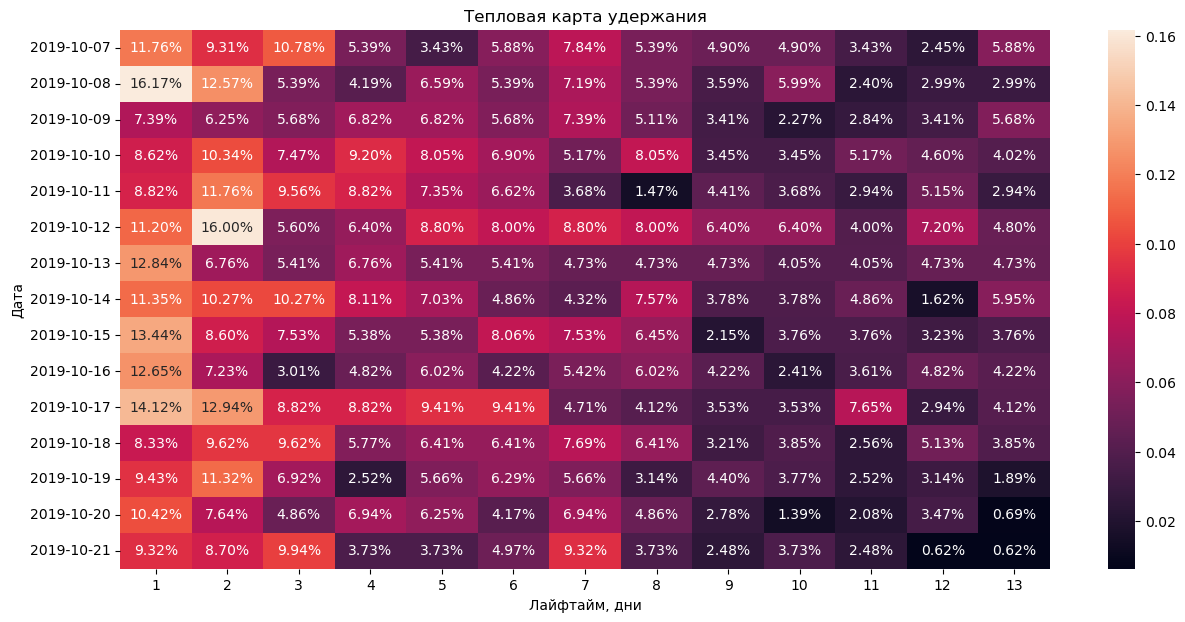

In [28]:
# строим хитмэп с учётом горизонта анализа

plt.figure(figsize = (15, 7))  # задаём размер графика
sns.heatmap(retention.drop(columns = ['cohort_size',0]), # удаляем размеры когорт
            annot = True,  # включаем подписи
            fmt = '.2%'  # отображаем значения в виде процентов
           )
plt.title('Тепловая карта удержания')  # название графика
plt.xlabel('Лайфтайм, дни')
plt.ylabel('Дата')
plt.show()

**ВЫВОД:** С хитмепа видно, что лучшее удержание на второй день показали пользователи, привлеченные 8 октября 2019 года - около 16%. Примерно с 10 дня и по 14 день удерживаются постоянные пользователи приложения - удержание примерно везде 2,5 - 5 %.

## 3.3 Время, проведённое в приложении <a class="anchor" id="time_in_app"></a>

In [29]:
# применим функцию, которая выводит время последнего действия сессии
sessions_end = get_session_end(data)

sessions['session_end'] = sessions_end['session_end']
sessions.head()

session_id                               user_id  \
0           1  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
1           2  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2           3  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
3           4  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
4           5  00157779-810c-4498-9e05-a1e9e3cedf93   

               session_start                session_end  
0 2019-10-07 13:39:45.989359 2019-10-07 13:49:41.716617  
1 2019-10-09 18:33:55.577963 2019-10-09 18:42:22.963948  
2 2019-10-21 19:52:30.778932 2019-10-21 20:07:30.051028  
3 2019-10-22 11:18:14.635436 2019-10-22 11:30:52.807203  
4 2019-10-19 21:34:33.849769 2019-10-19 21:59:54.637098

In [30]:
#посмотрим продолжительность сессии
sessions['duration']= (sessions['session_end'] - sessions['session_start']) / np.timedelta64(1,'m')
sessions.head()

session_id                               user_id  \
0           1  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
1           2  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2           3  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
3           4  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
4           5  00157779-810c-4498-9e05-a1e9e3cedf93   

               session_start                session_end   duration  
0 2019-10-07 13:39:45.989359 2019-10-07 13:49:41.716617   9.928788  
1 2019-10-09 18:33:55.577963 2019-10-09 18:42:22.963948   8.456433  
2 2019-10-21 19:52:30.778932 2019-10-21 20:07:30.051028  14.987868  
3 2019-10-22 11:18:14.635436 2019-10-22 11:30:52.807203  12.636196  
4 2019-10-19 21:34:33.849769 2019-10-19 21:59:54.637098  25.346455

In [31]:
sessions['duration'].describe()

count    9573.000000
mean       17.515304
std        28.541008
min         0.000000
25%         0.728246
50%         6.813951
75%        21.749375
max       434.991847
Name: duration, dtype: float64

**Есть разбросы в длительности сессий, поскольку среднее значение 17,5 мин, а медианное значение - 6,8 мин.**

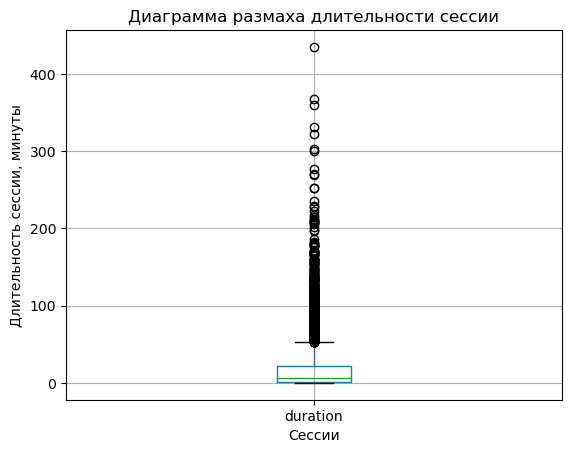

In [32]:
# посмотрим диаграмму размаха длительности сессии
sessions.boxplot(column='duration')
plt.xlabel('Сессии')
plt.ylabel('Длительность сессии, минуты')
plt.title('Диаграмма размаха длительности сессии')
plt.show()

In [33]:
print(np.percentile(sessions['duration'], [90, 95, 99]))

[ 48.77495325  70.09031683 134.27631881]


**10% пользователей сидели более 48 минут. Не более 5% пользователей сидели в приложении 71 минуту. И 1% пользователей сидели более 2 часов. Сократим датасет на 1% пользователей и выберем верхнюю границу длительности сессии 134 минут, таким образом отсеем аномальных пользователей.**

In [34]:
# посмотрим средние значения без аномальных значений длительности
new_sessions = sessions[sessions['duration']<=134]['duration']
new_sessions.describe()

count    9474.000000
mean       15.785036
std        22.347634
min         0.000000
25%         0.692951
50%         6.622912
75%        21.044859
max       133.973902
Name: duration, dtype: float64

**Сократив датасет на 1% аномальных пользователей, которые любят долго сидеть в приложении, мы получили среднюю длительность в приложении 16 мин.**

In [35]:
sessions['hour'] = sessions['session_start'].dt.hour

#категоризируем время дня
sessions['time_category'] = sessions['hour'].apply(categorize_sessions)
sessions.head()

session_id                               user_id  \
0           1  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
1           2  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2           3  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
3           4  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
4           5  00157779-810c-4498-9e05-a1e9e3cedf93   

               session_start                session_end   duration  hour  \
0 2019-10-07 13:39:45.989359 2019-10-07 13:49:41.716617   9.928788    13   
1 2019-10-09 18:33:55.577963 2019-10-09 18:42:22.963948   8.456433    18   
2 2019-10-21 19:52:30.778932 2019-10-21 20:07:30.051028  14.987868    19   
3 2019-10-22 11:18:14.635436 2019-10-22 11:30:52.807203  12.636196    11   
4 2019-10-19 21:34:33.849769 2019-10-19 21:59:54.637098  25.346455    21   

  time_category  
0          день  
1         вечер  
2         вечер  
3          день  
4         вечер

In [36]:
fig = px.histogram(
    sessions, 
    x="hour", 
    y="duration", 
    color="time_category", 
    histfunc='avg',
    hover_data=sessions.columns,
    title='Средняя длительность пользования приложения в течение дня'
)
fig.show()

**ВЫВОД:** Средняя длительность на протяжении всего дня примерно одинаковая: 16-20 мин. Меньше сидят в приложении с 20 вечера до часа ночи и ранним утром, с 3 до 8 утра - длительность с 12 до 16 мин.

In [37]:
#таблица с категорией времени - количеством действий - количеством сессий
duration_category = (
    sessions.groupby(['time_category'])
    .agg(
        {
            'duration':'mean',
            'session_id':'nunique'
        }
    )
    .rename(columns={'duration': 'duration_mean', 'session_id':'sessions_count'})
    .reset_index()
)
#time_category['event_per_session'] = round(time_category['events_count'] / time_category['sessions_count'],1)
#time_category = time_category.sort_values(by='event_per_session', ascending=False).reset_index()
duration_category

time_category  duration_mean  sessions_count
0         вечер      16.413127            3291
1          день      18.325377            4358
2          ночь      15.779336             441
3          утро      18.096913            1483

In [38]:
fig = px.histogram(
    sessions, 
    x="hour", 
    y="duration", 
    color="time_category", 
    histnorm='probability density',
    title='Вероятность длительности сессии',
    hover_data=sessions.columns
)
fig.show()

**ВЫВОД:** Вероятность, что сессия будет длинной с 2 ночи и до 8 утра очень маленькая (что логично, ведь это время, чтобы ложиться спать. Средняя длина сессии наиболее вероятна днем и вечером. Наиболее вероятно, что самые длинные сессии происходят в 9 - 10 (время, когда едут на работу).

## 3.4 Частота действий <a class="anchor" id="action"></a>

In [39]:
#посчитаем общее количество действий за весь период
events = data['event_name'].value_counts().reset_index()
events.columns = ['name', 'amount']
events['part'] = round(events['amount'] / events['amount'].sum(),3)
events

name  amount   part
0      tips_show   40055  0.540
1    photos_show   10012  0.135
2         search    6784  0.091
3    advert_open    6164  0.083
4  contacts_show    4529  0.061
5            map    3881  0.052
6  favorites_add    1417  0.019
7     tips_click     814  0.011
8  contacts_call     541  0.007

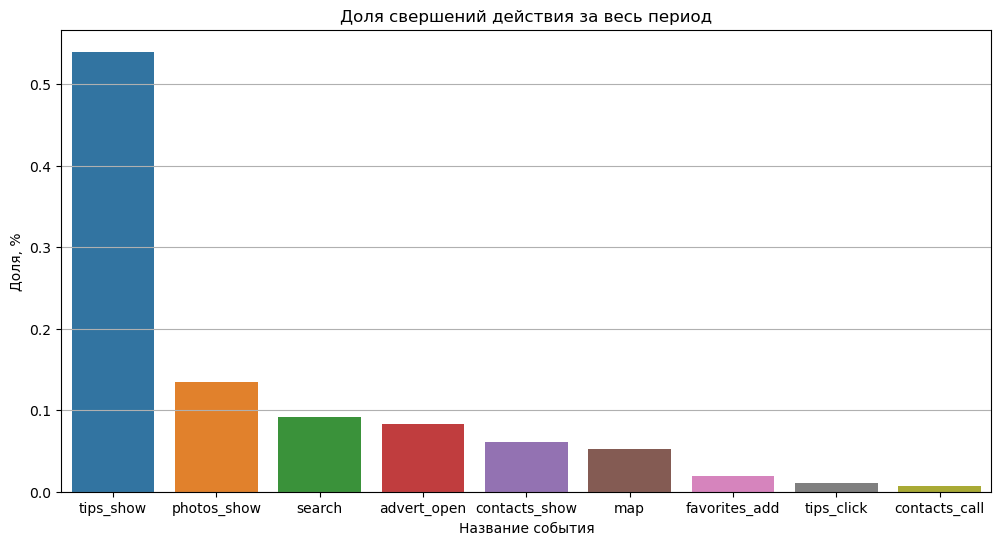

In [40]:
plt.figure(figsize=(12,6))
plt.grid()

sns.barplot(y='part', x='name', data = events);
plt.xlabel('Название события')
plt.ylabel('Доля, %')
plt.title('Доля свершений действия за весь период')
plt.show()

- Самое частое действие, которое совершают пользователи - `tips_show` (пользователь увидел рекомендованные объявления) - составляет примерно половину всех действий. Далее идет действие `photos_show` и `advert_open` -  просмотр фотографий в объявлении и открытие карточки объявления, соответственно. 
- Самые редкие действия - разные события, связанные с поиском по сайту и звонок по номеру телефона на карточке объявления.

In [41]:
data['hour'] = data['event_time'].dt.hour

#категоризируем время дня
data['time_category'] = data['hour'].apply(categorize_sessions)
data.head()

event_time event_name  \
2171 2019-10-07 13:39:45.989359  tips_show   
2172 2019-10-07 13:40:31.052909  tips_show   
2173 2019-10-07 13:41:05.722489  tips_show   
2174 2019-10-07 13:43:20.735461  tips_show   
2175 2019-10-07 13:45:30.917502  tips_show   

                                   user_id source  session_id  hour  \
2171  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other           1    13   
2172  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other           1    13   
2173  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other           1    13   
2174  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other           1    13   
2175  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other           1    13   

     time_category  
2171          день  
2172          день  
2173          день  
2174          день  
2175          день

In [42]:
#таблица с категорией времени - количеством действий - количеством сессий
time_category = (
    data.groupby(['time_category','event_name'])
    .agg(
        {
            'event_name':'count',
            'session_id':'nunique'
        }
    )
    .rename(columns={'event_name': 'events_count', 'session_id':'sessions_count'})
    .reset_index()
)
time_category['event_per_session'] = round(time_category['events_count'] / time_category['sessions_count'],1)
time_category = time_category.sort_values(by='event_per_session', ascending=False).reset_index()
time_category.head()

index time_category   event_name  events_count  sessions_count  \
0      8         вечер    tips_show         13334            1818   
1     26          ночь    tips_show          1817             254   
2     17          день    tips_show         19702            2804   
3     35          утро    tips_show          5202             910   
4      0         вечер  advert_open          2174             388   

   event_per_session  
0                7.3  
1                7.2  
2                7.0  
3                5.7  
4                5.6

In [43]:
fig=px.bar(
    time_category, 
    x='time_category', 
    y='event_per_session', 
    color='event_name', 
    barmode='group',
    title='Частота действий в зависимости от времени дня'
)
fig.show()

**Вывод:** 
- В любой период дня лидирующим действием в приложении является `tips_show` (пользователь увидел рекомендованные объявления), что логично, ведь пользователи пользуются им для поиска нужного продукта. Далее лидируют действия `advert_open` (открытие карточки объявления), `photos_show` (просмотр фотографий в объявлении).

- После действия отличаются в зависимости от времени дня. Днем и утром предпочитают смотреть номер телефона на карточке объявления `contacts_show`. Ночью предпочитают искать продукт `search`, а не звонить продавцу `contacts_call`. 

## 3.5 Конверсия в целевое действие — просмотр контактов  <a class="anchor" id="conversion"></a>

In [44]:
# датасет с фильтром = contacts_show
data_contacts_show = data.query('event_name == "contacts_show"')
data_contacts_show

event_time     event_name  \
42975 2019-10-20 19:17:18.659799  contacts_show   
42979 2019-10-20 19:23:11.839947  contacts_show   
42981 2019-10-20 19:30:31.912891  contacts_show   
42985 2019-10-20 20:04:53.349091  contacts_show   
43003 2019-10-29 21:26:40.258472  contacts_show   
...                          ...            ...   
19029 2019-11-03 14:38:51.134084  contacts_show   
19031 2019-11-03 14:41:24.780546  contacts_show   
19033 2019-11-03 14:42:26.444553  contacts_show   
19044 2019-11-03 15:48:05.420247  contacts_show   
19049 2019-11-03 15:51:57.899997  contacts_show   

                                    user_id  source  session_id  hour  \
42975  00157779-810c-4498-9e05-a1e9e3cedf93  yandex           6    19   
42979  00157779-810c-4498-9e05-a1e9e3cedf93  yandex           6    19   
42981  00157779-810c-4498-9e05-a1e9e3cedf93  yandex           6    19   
42985  00157779-810c-4498-9e05-a1e9e3cedf93  yandex           6    20   
43003  00157779-810c-4498-9e05-a1e9e3cedf93  yandex           8    21   
...                                     ...     ...         ...   ...   
19029  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573    14   
19031  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573    14   
19033  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573    14   
19044  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573    15   
19049  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573    15   

      time_category  
42975         вечер  
42979         вечер  
42981         вечер  
42985         вечер  
43003         вечер  
...             ...  
19029          день  
19031          день  
19033          день  
19044          день  
19049          день  

[4529 rows x 7 columns]

In [45]:
total_contacts_show = data_contacts_show['user_id'].nunique()
all_events = profiles['user_id'].nunique()
total_conversion = round(total_contacts_show / all_events,2)*100
print(f'Общая конверсия пользователей в целевое действие contacts_show: {total_conversion}%')

Общая конверсия пользователей в целевое действие contacts_show: 23.0%


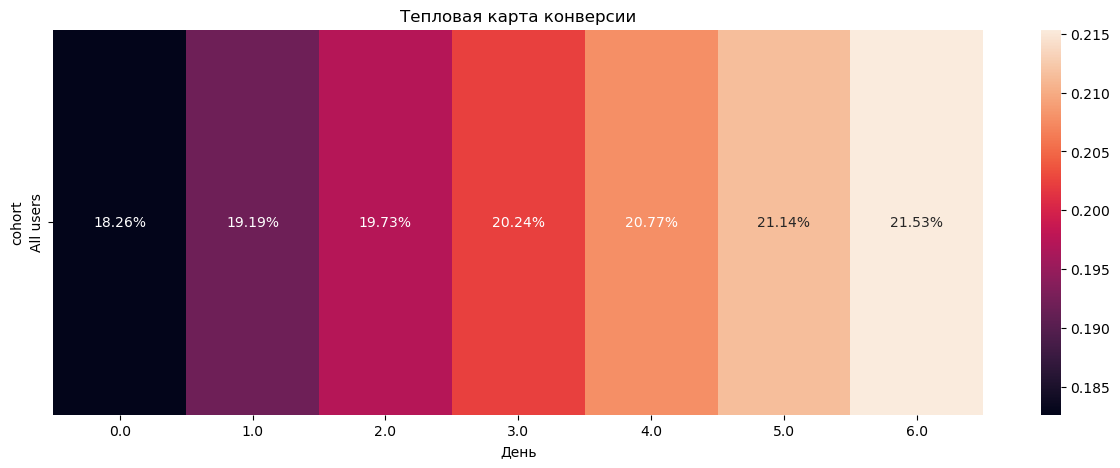

In [46]:
# считаем конверсию без параметра dimensions
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, data_contacts_show, observation_date, 7
)

# строим хитмэп по таблице конверсии
plt.figure(figsize=(15, 5)) # задаём размер сетки для графиков
sns.heatmap(conversion.drop(columns=['cohort_size']), annot=True, fmt='.2%')
plt.title('Тепловая карта конверсии')
plt.xlabel('День')
plt.show()

**ВЫВОД:** Общая конверсия растёт: от 18% в первый день «жизни» пользователей до 21,5% на седьмой день. Увеличение конверсии говорит о том, что пользователи активно просмотривают контакты в приложении (что является целевым действием).

# 4 Сегментация пользователей на основе действий <a class="anchor" id="groups"></a>

## 4.1 Сегментация пользователей <a class="anchor" id="groups1"></a>

Яндекс и Google - две самые популярные поисковые системы в России. Таким образом, сегментируем данные по источнику, с которого пользователь установил приложение. Изучив поведение пользователей в зависимости от источника, можно сделать более четкий акцент на рекламе. 
- Группа А - источник Яндекс
- Группа B - источник Google
- Группа C - другой источник

In [47]:
groupA = data.query('source == "yandex"')
groupB = data.query('source == "google"')
groupC = data.query('source == "other"')

In [48]:
usersA = groupA['user_id'].nunique()
usersB = groupB['user_id'].nunique()
usersC = groupC['user_id'].nunique()
print(f'Доля пользователей из группы А:{round(usersA/users,2)}')
print(f'Доля пользователей из группы B:{round(usersB/users,2)}')
print(f'Доля пользователей из группы C:{round(usersC/users,2)}')

Доля пользователей из группы А:0.45
Доля пользователей из группы B:0.26
Доля пользователей из группы C:0.29


**Размер долей подходят для дальнейшего анализа.**

## 4.2 Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)? <a class="anchor" id="groups_rr"></a>

In [49]:
# получаем сырые данные и готовую таблицу
retention_raw, retention = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=['dt','source']
)
retention.sample(3)

cohort_size    0         1         2         3         4  \
dt         source                                                             
2019-10-15 other            52  1.0  0.096154  0.076923  0.076923  0.000000   
2019-10-10 yandex           81  1.0  0.098765  0.111111  0.074074  0.111111   
2019-10-16 yandex           56  1.0  0.089286  0.071429  0.035714  0.089286   

                          5         6         7         8         9        10  \
dt         source                                                               
2019-10-15 other   0.038462  0.019231  0.076923  0.038462  0.000000  0.038462   
2019-10-10 yandex  0.086420  0.074074  0.049383  0.061728  0.012346  0.024691   
2019-10-16 yandex  0.071429  0.071429  0.035714  0.053571  0.071429  0.035714   

                         11        12        13  
dt         source                                
2019-10-15 other   0.019231  0.000000  0.057692  
2019-10-10 yandex  0.024691  0.024691  0.037037  
2019-10-16 yandex  0.035714  0.035714  0.017857

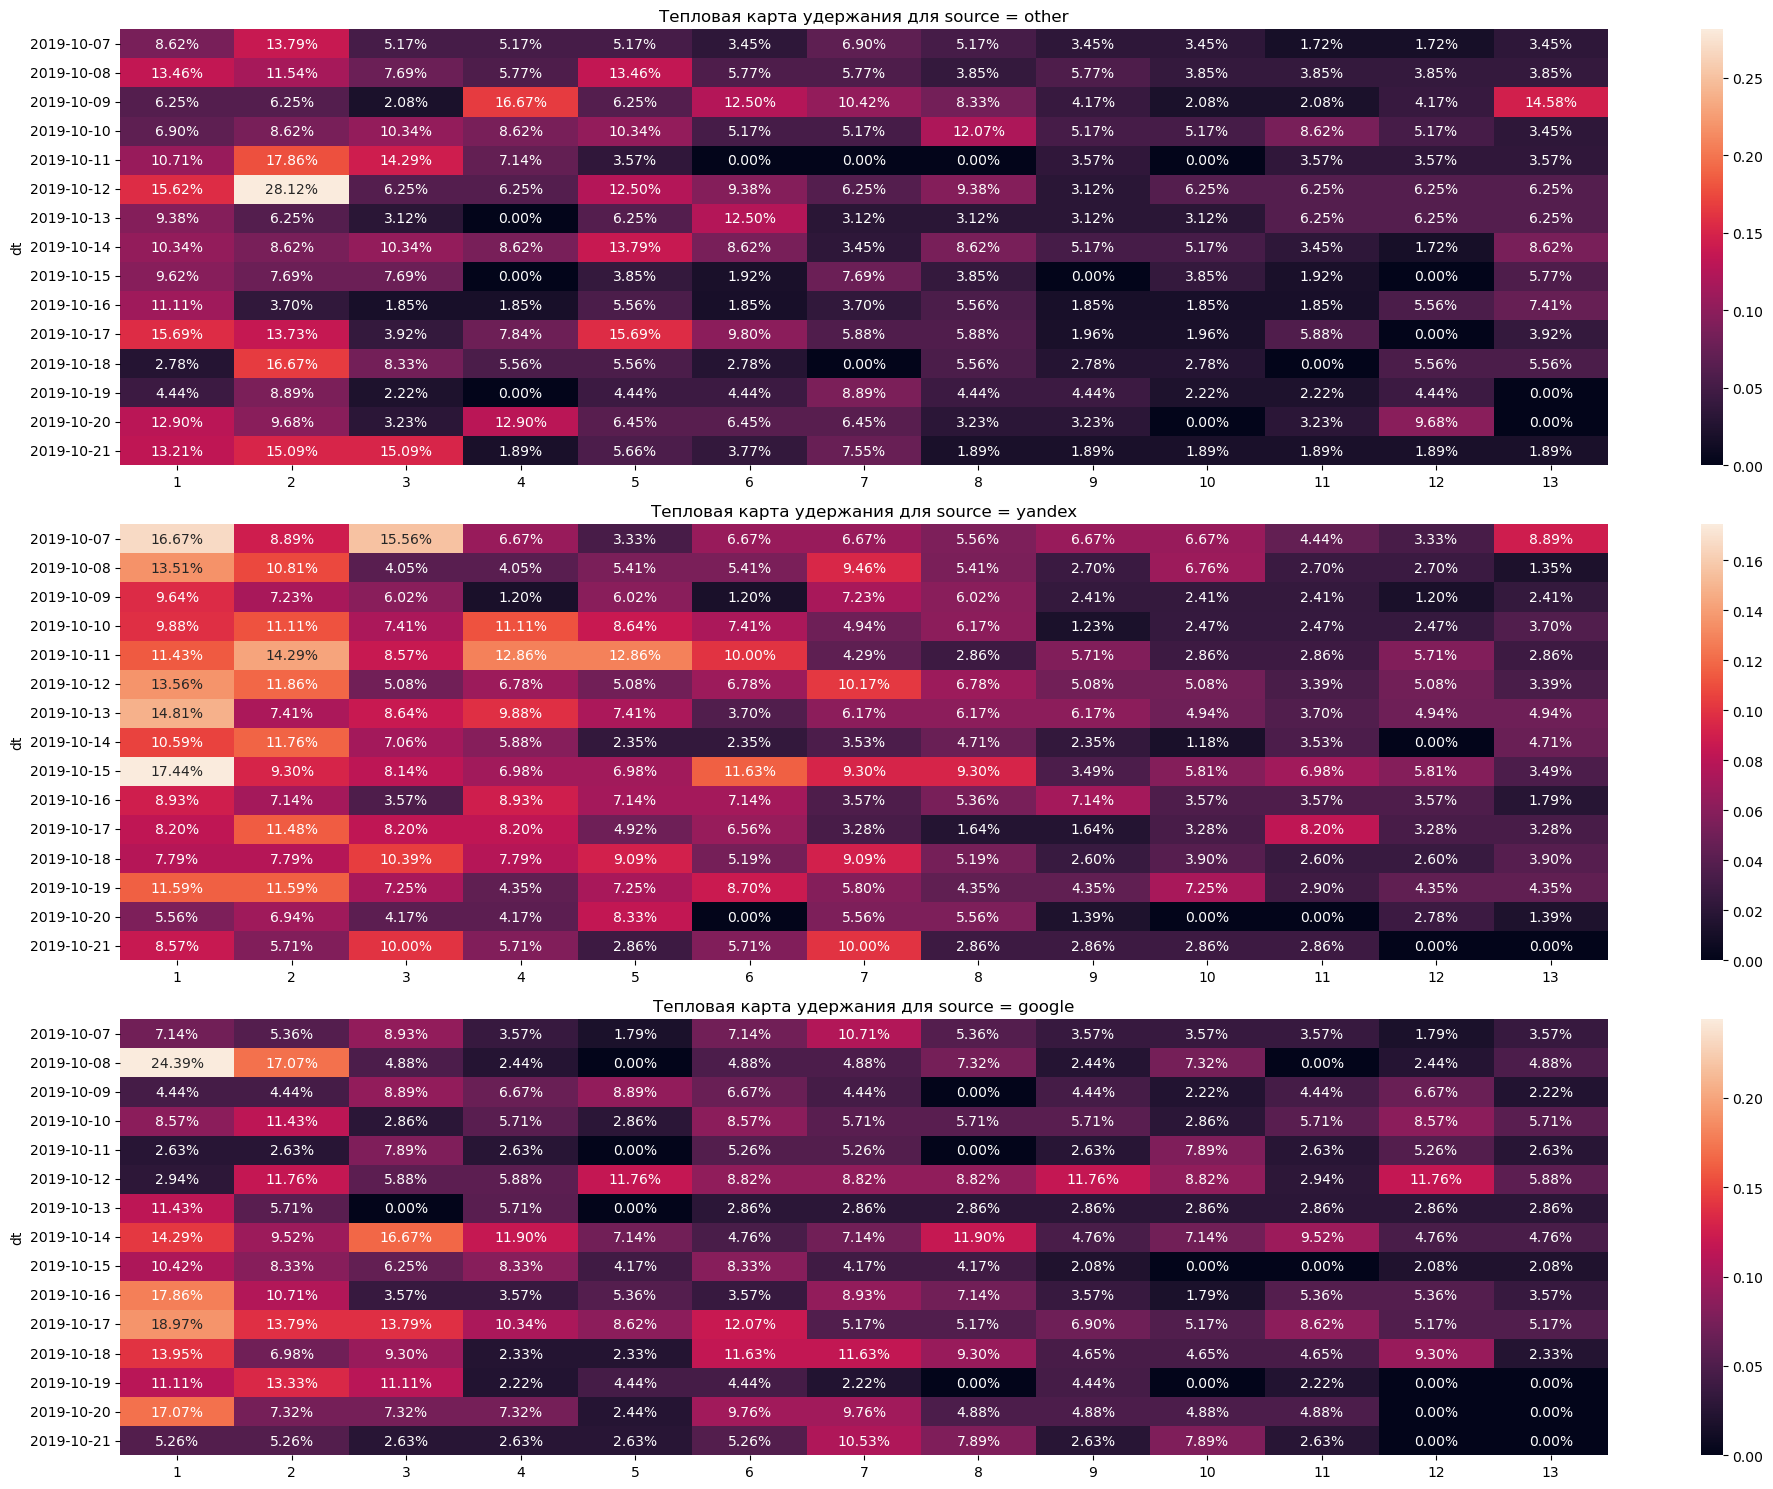

In [50]:
plt.figure(figsize=(20, 15)) # задаём размер сетки для графиков

for i, source in enumerate(profiles['source'].unique()):
    sns.heatmap(
        retention.query('source == @source')
        # удаляем source из индексов, чтобы не загромождать графики
        .droplevel('source')
        # исключаем размеры когорт и удержание первого дня
        .drop(columns=['cohort_size', 0]),
        # добавляем подписи значений
        annot=True,
        # переводим значения в проценты
        fmt='.2%',
        # строим каждый график в своей ячейке
        ax=plt.subplot(3, 1, i + 1),
    )
    # задаём названия графиков с учётом значения source
    plt.title('Тепловая карта удержания для source = {}'.format(source))

plt.tight_layout()  # «подгоняем» размер графиков, чтобы уместились подписи
plt.show()

**Выводы:** 
- Каждой строке таблицы удержания соответствуют два параметра: дата и источник, откуда пришел пользователь. Сразу же заметно, что у пользователей, которые пришли из Яндекса, удержание выше: хитмеп в начале дней в основном оранжевый-красный. Удержание пользователей с 15 мая на второй день составило около 18%. Примерно с 10 дня использования приложения удержание пользователей стабильным (с единичными всплесками удержания).
- Общий профиль удержания пользователей, которые пришли из Google и других источников примерно одинаковый: среднее удержание пользователей в диапазоне 2,5%-5% с вспышками удержания вплоть до 15%. Однако удержание пользователей из Google  в первые дни значительно лучше.

## 4.3 Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)? <a class="anchor" id="groups_conv"></a>

In [51]:
# получаем сырые данные, таблицу конверсии и таблицу динамики конверсии
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, data_contacts_show, observation_date, horizon_days, dimensions=['source']
)

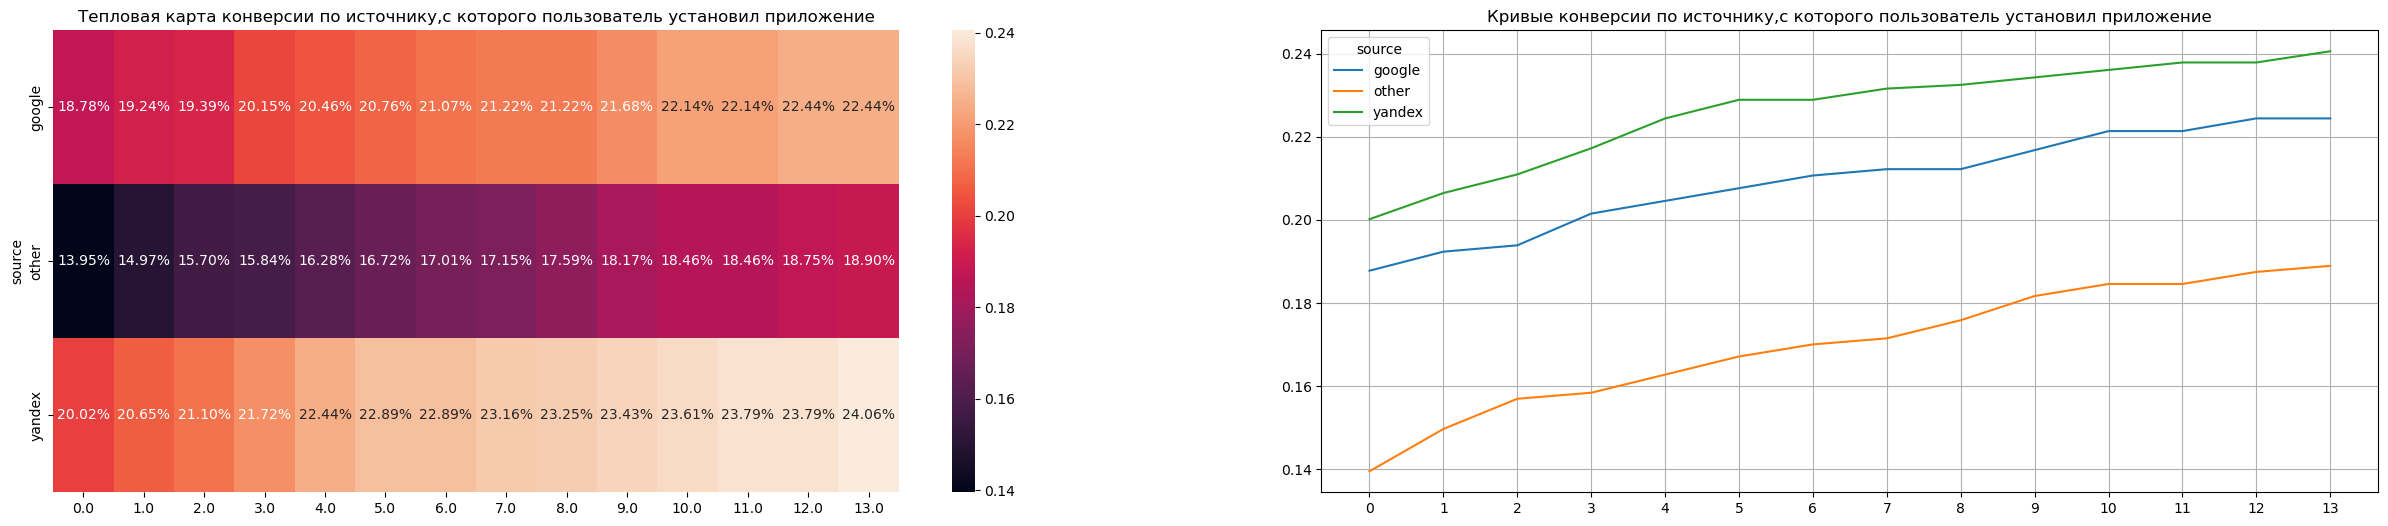

In [52]:
plt.figure(figsize = (30, 6)) # задаём размер «подложки»

# исключаем размеры когорт
# конверсии первого дня различаются, их удалять не нужно
report = conversion.drop(columns = ['cohort_size'])

sns.heatmap(
    report, annot=True, fmt='.2%', ax=plt.subplot(1, 2, 1)
)  # в первой ячейке таблицы графиков строим тепловую карту
plt.title('Тепловая карта конверсии по источнику,с которого пользователь установил приложение')

report.T.plot(
    grid=True, xticks=list(report.columns.values), ax=plt.subplot(1, 2, 2)
)  # во второй — кривые конверсии
plt.title('Кривые конверсии по источнику,с которого пользователь установил приложение')

plt.show() 

**Выводы:**
- Выше всего конверсия у пользователей, которые пришли через Яндекс: в первый день посещения более 20% новых пользователей посмотрели контакты продавца. К 14 дню доля пользоввателей достигает аж 24%.

- Хуже всего конвертируются пользователи, которые пришли из других источников, не из Яндекса, и не из Google. Конверсия первого дня составляет окол 14% и к 14 дню поднимается почти до 19%.

# 5 Решение гипотез <a class="anchor" id="hypotheses"></a>

## 5.1 Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов <a class="anchor" id="hypotheses1"></a>

Для проверки гипотезы о равенстве долей используется **z-критерий**. 

**Нулевая гипотеза:** Cтатистически значимых различий в равенстве долей групп A (пользователи из Яндекс) и B (пользователи из Google) нет - p-value > alpha (критический уровень статистической значимости, равен 0,05).

**Альтернативная гипотеза:** статистически значимые различия есть - p-value < alpha.

In [53]:
new_data = data.query('source == "yandex" or source == "google"')
new_data.loc[new_data['source'] == 'yandex', 'source'] = 'A'
new_data.loc[new_data['source'] == 'google', 'source'] = 'B'

new_data = new_data.rename(columns={'source':'group'})

data_contacts_show = new_data.query('event_name == "contacts_show"')

In [54]:
# количество пользователей в каждой группе
users_by_group = new_data.groupby('group')['user_id'].nunique().reset_index()
users_by_group = users_by_group.rename(columns={'user_id':'total'})
users_by_group

group  total
0     A   1934
1     B   1129

In [55]:
events_groups = data_contacts_show.groupby('group')['user_id'].nunique().reset_index()
events_groups = events_groups.rename(columns={'user_id':'total_of_contacts_show'})

events_groups

group  total_of_contacts_show
0     A                     478
1     B                     275

In [56]:
alpha = .05 # критический уровень статистической значимости

successes = events_groups['total_of_contacts_show'].to_list()
trials = users_by_group['total'].to_list()

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

In [57]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

In [58]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**ВЫВОД:** По результатам A/B-теста значимой разницы между группами не выявлено.

## 5.2 Пользователи, которые чаще пользуются приложением по будням, демонстрируют выше конверсию в просмотры контактов, чем пользователи, которые заходят в приложение в основном по выходням <a class="anchor" id="hypotheses2"></a>

Для проверки гипотезы о равенстве долей используется **z-критерий**. 

**Нулевая гипотеза:** Cтатистически значимых различий в равенстве долей групп A (пользователи по будням) и B (пользователи по выходным) нет - p-value > alpha (критический уровень статистической значимости, равен 0,05).

**Альтернативная гипотеза:** статистически значимые различия есть - p-value < alpha.

In [59]:
weekday_data = data
weekday_data['weekday'] = weekday_data['event_time'].dt.weekday
weekday_data.loc[weekday_data['weekday'] == 0, 'weekday'] = 'A'
weekday_data.loc[weekday_data['weekday'] == 1, 'weekday'] = 'A'
weekday_data.loc[weekday_data['weekday'] == 2, 'weekday'] = 'A'
weekday_data.loc[weekday_data['weekday'] == 3, 'weekday'] = 'A'
weekday_data.loc[weekday_data['weekday'] == 4, 'weekday'] = 'A'
weekday_data.loc[weekday_data['weekday'] == 5, 'weekday'] = 'B'
weekday_data.loc[weekday_data['weekday'] == 6, 'weekday'] = 'B'
weekday_data = weekday_data.rename(columns={'weekday':'group'})
weekday_data

event_time     event_name  \
2171  2019-10-07 13:39:45.989359      tips_show   
2172  2019-10-07 13:40:31.052909      tips_show   
2173  2019-10-07 13:41:05.722489      tips_show   
2174  2019-10-07 13:43:20.735461      tips_show   
2175  2019-10-07 13:45:30.917502      tips_show   
...                          ...            ...   
19048 2019-11-03 15:51:23.959572      tips_show   
19049 2019-11-03 15:51:57.899997  contacts_show   
19050 2019-11-03 16:07:40.932077      tips_show   
19051 2019-11-03 16:08:18.202734      tips_show   
19052 2019-11-03 16:08:25.388712      tips_show   

                                    user_id  source  session_id  hour  \
2171   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other           1    13   
2172   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other           1    13   
2173   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other           1    13   
2174   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other           1    13   
2175   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   other           1    13   
...                                     ...     ...         ...   ...   
19048  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573    15   
19049  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573    15   
19050  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573    16   
19051  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573    16   
19052  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573    16   

      time_category group  
2171           день     A  
2172           день     A  
2173           день     A  
2174           день     A  
2175           день     A  
...             ...   ...  
19048          день     B  
19049          день     B  
19050          день     B  
19051          день     B  
19052          день     B  

[74197 rows x 8 columns]

In [60]:
data_contacts_show_weekday = weekday_data.query('event_name == "contacts_show"')
data_contacts_show_weekday

event_time     event_name  \
42975 2019-10-20 19:17:18.659799  contacts_show   
42979 2019-10-20 19:23:11.839947  contacts_show   
42981 2019-10-20 19:30:31.912891  contacts_show   
42985 2019-10-20 20:04:53.349091  contacts_show   
43003 2019-10-29 21:26:40.258472  contacts_show   
...                          ...            ...   
19029 2019-11-03 14:38:51.134084  contacts_show   
19031 2019-11-03 14:41:24.780546  contacts_show   
19033 2019-11-03 14:42:26.444553  contacts_show   
19044 2019-11-03 15:48:05.420247  contacts_show   
19049 2019-11-03 15:51:57.899997  contacts_show   

                                    user_id  source  session_id  hour  \
42975  00157779-810c-4498-9e05-a1e9e3cedf93  yandex           6    19   
42979  00157779-810c-4498-9e05-a1e9e3cedf93  yandex           6    19   
42981  00157779-810c-4498-9e05-a1e9e3cedf93  yandex           6    19   
42985  00157779-810c-4498-9e05-a1e9e3cedf93  yandex           6    20   
43003  00157779-810c-4498-9e05-a1e9e3cedf93  yandex           8    21   
...                                     ...     ...         ...   ...   
19029  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573    14   
19031  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573    14   
19033  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573    14   
19044  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573    15   
19049  fffb9e79-b927-4dbb-9b48-7fd09b23a62b  google        9573    15   

      time_category group  
42975         вечер     B  
42979         вечер     B  
42981         вечер     B  
42985         вечер     B  
43003         вечер     A  
...             ...   ...  
19029          день     B  
19031          день     B  
19033          день     B  
19044          день     B  
19049          день     B  

[4529 rows x 8 columns]

In [61]:
# количество пользователей в каждой группе
users_by_weekday = weekday_data.groupby('group')['user_id'].nunique().reset_index()
users_by_weekday = users_by_weekday.rename(columns={'user_id':'total'})
users_by_weekday

group  total
0     A   3465
1     B   1562

In [62]:
events_weekday = data_contacts_show_weekday.groupby('group')['user_id'].nunique().reset_index()
events_weekday = events_weekday.rename(columns={'user_id':'total_of_contacts_show'})

events_weekday

group  total_of_contacts_show
0     A                     768
1     B                     318

In [63]:
alpha = .05 # критический уровень статистической значимости

successes = events_weekday['total_of_contacts_show'].to_list()
trials = users_by_weekday['total'].to_list()

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

In [64]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

In [65]:
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.14988552302320435
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**ВЫВОД:** По результатам A/B-теста значимой разницы между группами не выявлено.

# 6 Выводы <a class="anchor" id="conclusion"></a>

**Предобработка**: На этапе предобработки данных выяснилось, что пропусков и дубликатов нет. Были изменены названия столбцов в обоих датасетах. Изменили тип данных на временной в датасете mobile_dataset.csv.

**Сессии:** Сформированы сессии, разница между которыми условно была взята 60 мин.

**Retetion Rate** Лучшее удержание на второй день показали пользователи, привлеченные 8 октября 2019 года. Примерно с 10 дня и по 14 день удерживаются постоянные пользователи приложения - удержание примерно везде 2,5 - 5 %.

**Длительность сессии:** 
- Есть разбросы в длительности сессий, поскольку среднее значение 17,5 мин, а медианное значение - 6,8 мин. Сократив датасет на 1% аномальных пользователей, которые любят долго сидеть в приложении, мы получили среднюю длительность в приложении 16 мин. 
- Средняя длительность на протяжении всего дня примерно одинаковая: 16-20 мин. Меньше сидят в приложении с 20 вечера до часа ночи и ранним утром, с 3 до 8 утра - длительность с 12 до 16 мин.
- Вероятность, что сессия будет длинной с 2 ночи и до 8 утра очень маленькая (что логично, ведь это время, чтобы ложиться спать. Средняя длина сессии наиболее вероятна днем и вечером. Наиболее вероятно, что самые длинные сессии происходят в 9 - 10 (время, когда едут на работу).

**Частота действий:** 
- Самое частое действие, которое совершают пользователи - tips_show (пользователь увидел рекомендованные объявления) - составляет примерно половину всех действий. Далее идет действие photos_show и advert_open - просмотр фотографий в объявлении и открытие карточки объявления, соответственно.
- Самые редкие действия - разные события, связанные с поиском по сайту и звонок по номеру телефона на карточке объявления.
- В любой период дня лидирующим действием в приложении является tips_show (пользователь увидел рекомендованные объявления), что логично, ведь пользователи пользуются им для поиска нужного продукта. Далее лидируют действия advert_open (открытие карточки объявления), photos_show (просмотр фотографий в объявлении).После действия отличаются в зависимости от времени дня. Днем и утром предпочитают смотреть номер телефона на карточке объявления contacts_show. Ночью предпочитают искать продукт search, а не звонить продавцу contacts_call.

**Конверсия:** Общая конверсия пользователей в целевое действие contacts_show: 23.0%. Конверсия растёт: от 18% в первый день «жизни» пользователей до 21,5% на седьмой день.

**Удержание в зависимости от сегментации**
- У пользователей, которые пришли из Яндекса, удержание выше: хитмеп в начале дней в основном оранжевый-красный. Удержание пользователей с 15 мая на второй день составило около 18%. Примерно с 10 дня использования приложения удержание пользователей стабильным (с единичными всплесками удержания).
- Общий профиль удержания пользователей, которые пришли из Google и других источников примерно одинаковый: среднее удержание пользователей в диапазоне 2,5%-5% с вспышками удержания вплоть до 15%. Однако удержание пользователей из Google в первые дни значительно лучше.

**Конверсия в зависимости от сегментации**
- Выше всего конверсия у пользователей, которые пришли через Яндекс: в первый день посещения более 20% новых пользователей посмотрели контакты продавца. К 14 дню доля пользоввателей достигает аж 24%.
- Хуже всего конвертируются пользователи, которые пришли из других источников, не из Яндекса, и не из Google. Конверсия первого дня составляет окол 14% и к 14 дню поднимается почти до 19%.

**Гипотеза о сходстве долей конверсии пользователей, пришедших из яндекса и пользователей из гугла:** По результатам A/B-теста значимой разницы между группами не выявлено.

**Гипотеза о сходстве долей конверсии пользователей, которые пользуются приложением в будни и в выходные:** По результатам A/B-теста значимой разницы между группами не выявлено.

**Рекомендации по продвижению приложения:**
- Retention rate говорит о наличии постоянных пользователей. Удержание выше в первые дни и остается постоянным на протяжении следуюющих дней у пользователей, которые пришли из Яндекса. Следует больше уделять внимание рекламе через Яндекс. Хотя на самом деле не стоит забывать о рекламе в гугл, поскольку разницы между группами из Яндекса и Гугл нет, согласно гипотезе о сходстве долей конверсии пользователей. 
- Чтобы поощерять пользоватаелей и увеличивать удержание необходимо придумать систему лояльности или добавить бонусы при ежедневном посещении приложения.
- Целевое действие (просмотр контактов) составляет лишь 0,7% среди всех действий - необходимо увеличить данный показатель. Например, с помощью push-уведомлений через некое время после добавления объявления в избранное. Не стоит с ними перебарщивать.

# 7 Tableau <a class="anchor" id="tableau"></a>

Ссылка на Tableau - <https://public.tableau.com/app/profile/ania.prokosheva/viz/mobile_project/Dashboard1?publish=yes>

# 8 Презентация  <a class="anchor" id="presentation"></a> 

Ссылка на презентацию - <https://docs.google.com/presentation/d/1uuVp0nm9osESM_xHDZ92vo285D8Umxd1dafDYRTN1PQ/edit?usp=sharing>